### Inicio do projeto
EDA

In [1]:
# Importando as bilbiotecas para o EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import datetime as dt

# Configurando o estilo dos gráficos para um visual mais agradável
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅   Bibliotecas importadas com sucesso!")


✅   Bibliotecas importadas com sucesso!


In [ ]:
# Carregando o dados
df = pd.read_csv(r'C:\Users\proje\OneDrive\Ambiente de Trabalho\Projetos_2025\projeto_EDA+ML\dados\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exibindo as 5 primeiras linhas para confirmar que carregou corretamente
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Verificando as informações do dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Converção da coluna 'TotalCharges' para um formato numérico
# Usarei 'errors='coerce'' para transformar qualquer valor que não seja um número em 'NaN' (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("✅ Conversão realizada com sucesso!")

# Verificando a quantidade de valores nulos no dataset após a conversão
df.isnull().sum()

✅ Conversão realizada com sucesso!


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Exibindo as linhas onde 'TotalCharges' é nulo para entender o padrão
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
# Substituindo os valores nulos em 'TotalCharges' por 0
# 'inplace=True' vai modifica o DataFrame diretamente, sem precisar de reatribuição (df = ...)
df['TotalCharges'].fillna(0, inplace=True)

# Verificando novamente se ainda existem valores nulos
print("Valores nulos após o tratamento:")
print(df.isnull().sum())

Valores nulos após o tratamento:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\proje\AppData\Local\Temp\ipykernel_20412\1095841890.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [12]:
# Tratamento de alvo target
# Coverter 'Yes' ou 'No' para facilitar a matemática dempois
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [13]:
# Pergunta: Qual a taxa de Churn?
churn_rate = df['Churn'].value_counts(normalize=True) * 100

print("-" * 30)
print(f"Taxa de Retenção (Não sairam): {churn_rate[0]:.2f}%")
print(f"Taxa de Churn    (Saíram):     {churn_rate[1]:.2f}%")
print("-" * 30)

------------------------------
Taxa de Retenção (Não sairam): 73.46%
Taxa de Churn    (Saíram):     26.54%
------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

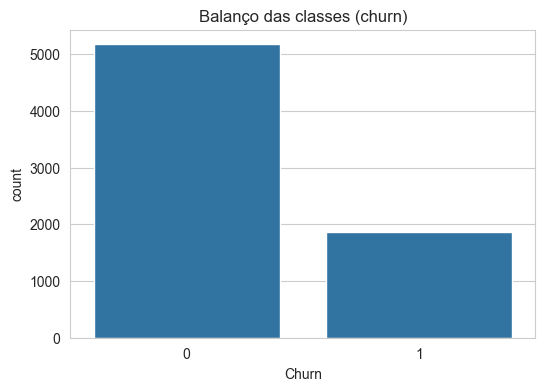

In [14]:
# Gráfico para verificação
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Balanço das classes (churn)')
plt.show


--- O que mais influencia o Churn? (Correlação) ---
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


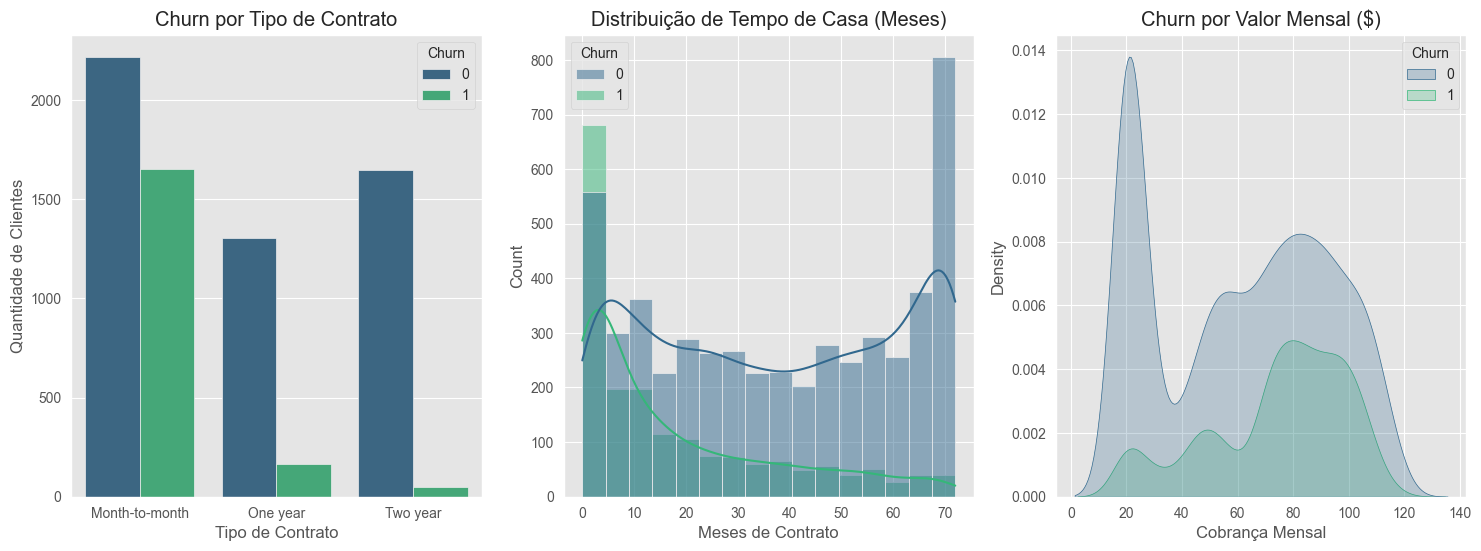

In [ ]:
# Configurações visuais
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- GRÁFICO 1: Contratos ---
# Analisando os tipos de contratos que afetam o cancelamento
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Churn por Tipo de Contrato')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Quantidade de Clientes')

# --- GRÁFICO 2: Tempo de Casa ---
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[1], palette='viridis')
axes[1].set_title('Distribuição de Tempo de Casa (Meses)')
axes[1].set_xlabel('Meses de Contrato')

# --- GRÁFICO 3: Impacto do Preço (MonthlyCharges)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[2], palette='viridis')
axes[2].set_title('Churn por Valor Mensal ($)')
axes[2].set_xlabel('Cobrança Mensal')

# --- Correlação Numérica ---
# Verificando matematicamente quem tem mais ligação com o Churn
# (Transformando o dataset apenas para calcular a correlação das variáveis numéricas)
corr = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print("\n--- O que mais influencia o Churn? (Correlação) ---")
print(corr)

### O que os gráficos mostram:

1. Gráfico 1 (Contratos): A barra "Month-to-month" (Mensal). A barra de Churn (cor diferente verde clara no viridis) é gigante comparada aos contratos de 1 ou 2 anos? Insight provável: Clientes sem fidelidade saem muito mais.

2. Gráfico 2 (Tenure): O pico no lado esquerdo (0-10 meses). A maioria dos cancelamentos acontece logo no início

3. Gráfico 3 (Preço): A curva de quem sai (Churn=1) está mais para a direita (valores altos)? Isso indica que preços altos empurram o cliente para fora.